In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
from Jvis import JTSNEBASE, JTSNE
from sklearn.cluster import KMeans
from anndata import AnnData
import scanpy as sc
#from joint_metrics import *

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [13]:
expr_mat = pd.read_csv("./GSE126074_CellLineMixture_SNAREseq_cDNA_counts.tsv", sep="\t")

Pre-Processing

In [14]:
scale_factor= 1000
print(expr_mat)
expr_mat = expr_mat.values
print(expr_mat)
expr_mat_log_t = np.log(scale_factor*expr_mat+1)

              ACTTTCTAATCA  GAGAGAAAACCT  TACGGCTGTTAT  GACGCGTAAGTG  \
A1BG-AS1                 0             0             0             0   
A2M                      0             0             0             0   
A2M-AS1                  0             0             0             0   
A2ML1                    0             0             0             0   
A2ML1-AS1                0             0             0             0   
...                    ...           ...           ...           ...   
ZZZ3                     0             0             0             0   
bP-21201H5.1             0             0             0             0   
bP-21264C1.2             0             1             0             0   
bP-2189O9.2              0             0             0             0   
bP-2189O9.3              0             0             0             0   

              GAAAGGACTGCA  TGACCTGGATAA  ACTCCGTTCACT  TAGGTAGCGCGC  \
A1BG-AS1                 0             0             0         

In [15]:
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)

In [16]:
joint_tsne= TSNE(init="random").fit_transform(expr_reduced)

In [17]:
adata = AnnData(X=expr_reduced)
sc.pp.neighbors(adata, use_rep="X")
sc.tl.louvain(adata, resolution=0.2, key_added="louvain")
louv_labels = np.array(adata.obs["louvain"].tolist())
louv_labels = [int(x) for x in louv_labels]

c:\Users\divij\Desktop\datavis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [18]:
np.unique(louv_labels)

array([0, 1, 2, 3])

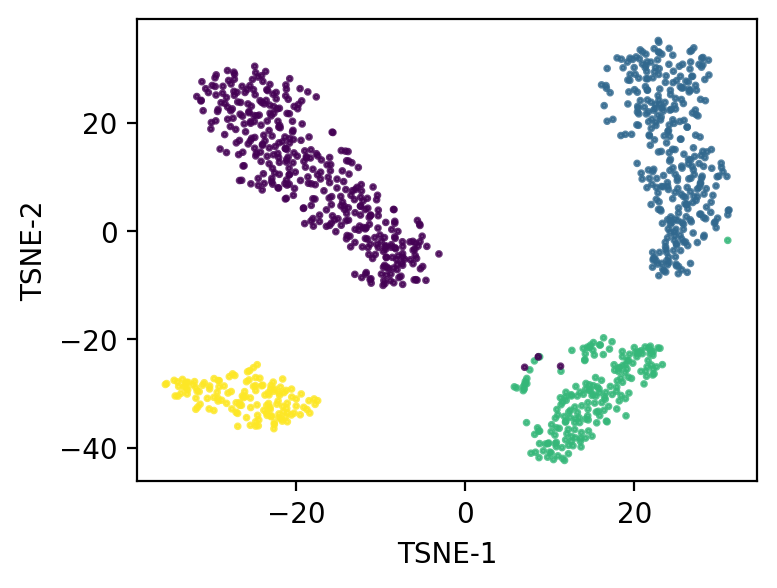

In [23]:
plt.figure(figsize=(4,3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3, c=louv_labels, alpha=0.8)
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

In [30]:
def make_noise(expression_matrix, prop, rseed):
    np.random.seed(rseed)
    n_rows,n_cols =expression_matrix.shape
    n_elem=round(n_cols*0.8)
    s = np.arange(n_cols)
    for i in range(n_rows):
        row_id = list(np.random.choice(s, size=n_elem, replace=False))
        v = expression_matrix[i, row_id]
        np.random.shuffle(v)
        expression_matrix[i, row_id] = v

In [38]:
print(louv_labels)
louv_labels=np.array(louv_labels)
print(louv_labels)

[1 0 2 ... 2 0 0]
[1 0 2 ... 2 0 0]


In [31]:
cl1=0
cl2=1
selected_cells = (louv_labels==cl1) + (louv_labels==cl2)
expr_matsub = expr_mat[:, selected_cells]
make_noise(expression_matrix = expr_matsub, prop = 0.8, rseed = 0)
expr_copy = np.copy(expr_mat)                     
expr_copy[:, selected_cells] = expr_matsub

In [32]:
expr_matsub.shape,expr_copy.shape

((18666, 715), (18666, 1047))

In [40]:
scale_factor=1000
expr_mat_log_t = np.log(scale_factor*expr_copy + 1)
expr_reduced = PCA(n_components=20).fit_transform(expr_mat_log_t.T)
tsne = TSNE(init="random").fit_transform(expr_reduced)

In [41]:
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','b','g', 'orange'])
classes = ['H1', 'BJ', 'K562', 'GM12878']

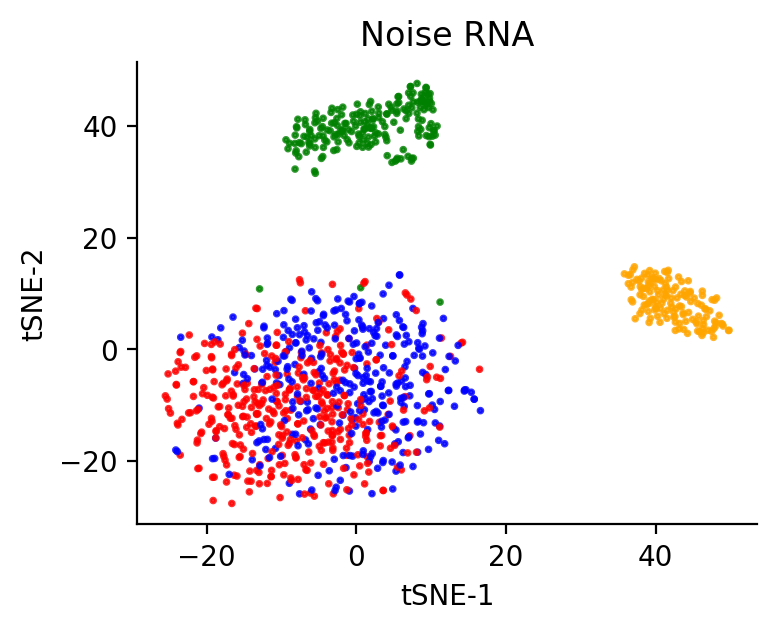

In [44]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(tsne[:,0], tsne[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
# ax.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise RNA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA.png', bbox_inches='tight')
plt.show()

ATAC-Seq

In [ ]:
atac_topic_mat = pd.read_csv("./GSE126074_CellLineMixture_SNAREseq_chromatin_topics.tsv", sep="\t")

In [ ]:
atac_reduced = PCA(n_components=10).fit_transform(atac_topic_mat.values.T)

In [ ]:
atac_reduced.shape

In [ ]:
joint_tsne = TSNE(init="random").fit_transform(atac_reduced)
plt.figure(figsize=(4, 3))
plt.scatter(joint_tsne[:,0], joint_tsne[:,1], s=3, c = louv_labels)
plt.xlabel('tSNE-1')
plt.ylabel('tSNE-2')
plt.show()

Random Modality

In [ ]:
noise_matrix = 100*np.random.rand(1047,20)

In [ ]:
tsne_noisemodality = TSNE(init='pca').fit_transform(noise_matrix)

In [ ]:
noise_tsne = TSNE(init="random").fit_transform(tsne_noisemodality)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(tsne[:,0], tsne[:,1], s=3, c = louv_labels, alpha=0.8, cmap=colours)
ax.set_xlabel('tSNE-1')
ax.set_ylabel('tSNE-2')
ax.set_title('Noise RNA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('/data/hoan/plots/snare_tsne_noiseRNA.png', bbox_inches='tight')
plt.show()

Joint Visualisation

In [ ]:
data = {"dna": expr_reduced, "chromatin": atac_reduced}
joint_tsne_obj = JTSNE(init="pca")
joint_tsne = joint_tsne_obj.fit_transform(X = data)

In [ ]:
# kNN = 10
# KNI_metrics = KNI(joint_tsne, louv_labels, kNN)
# CARI_metrics = CARI(joint_tsne, louv_labels)
# print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics)

In [ ]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_label("Joint 2 modal")
ax.spines["top"].set_visible=False
ax.spines["right"].set_visible=False
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

Joint Visualisation 3 modalities

In [ ]:
data = {"dna": expr_reduced, "chromatin": atac_reduced, "noise": noise_matrix}
joint_tsne_obj = JTSNE(init="pca")
joint_tsne = joint_tsne_obj.fit_transform(X = data, method="auto", _lambda = 3)

In [ ]:
fig = plt.figure(figsize=(4.3))
ax = fig.add_subplot(111)
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_label("Joint 3 modal")
ax.spines["top"].set_visible=False
ax.spines["right"].set_visible=False
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")